In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')
# %run city_EDA.ipynb

In [164]:
#load the datasets
cab_data = pd.read_csv('./DataSets/Cab_Data.csv')

In [165]:
#Investigate cab_data dataset
cab_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [168]:
cab_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,07-01-2016,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,03-01-2016,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,07-01-2016,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,12-01-2016,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,06-01-2016,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [50]:
cab_data.shape

(359392, 7)

In [51]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [52]:
cab_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [53]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [54]:
cab_data.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [55]:
cab_data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [56]:
cab_data['City'].unique() 

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

Text(0, 0.5, 'Price Charged')

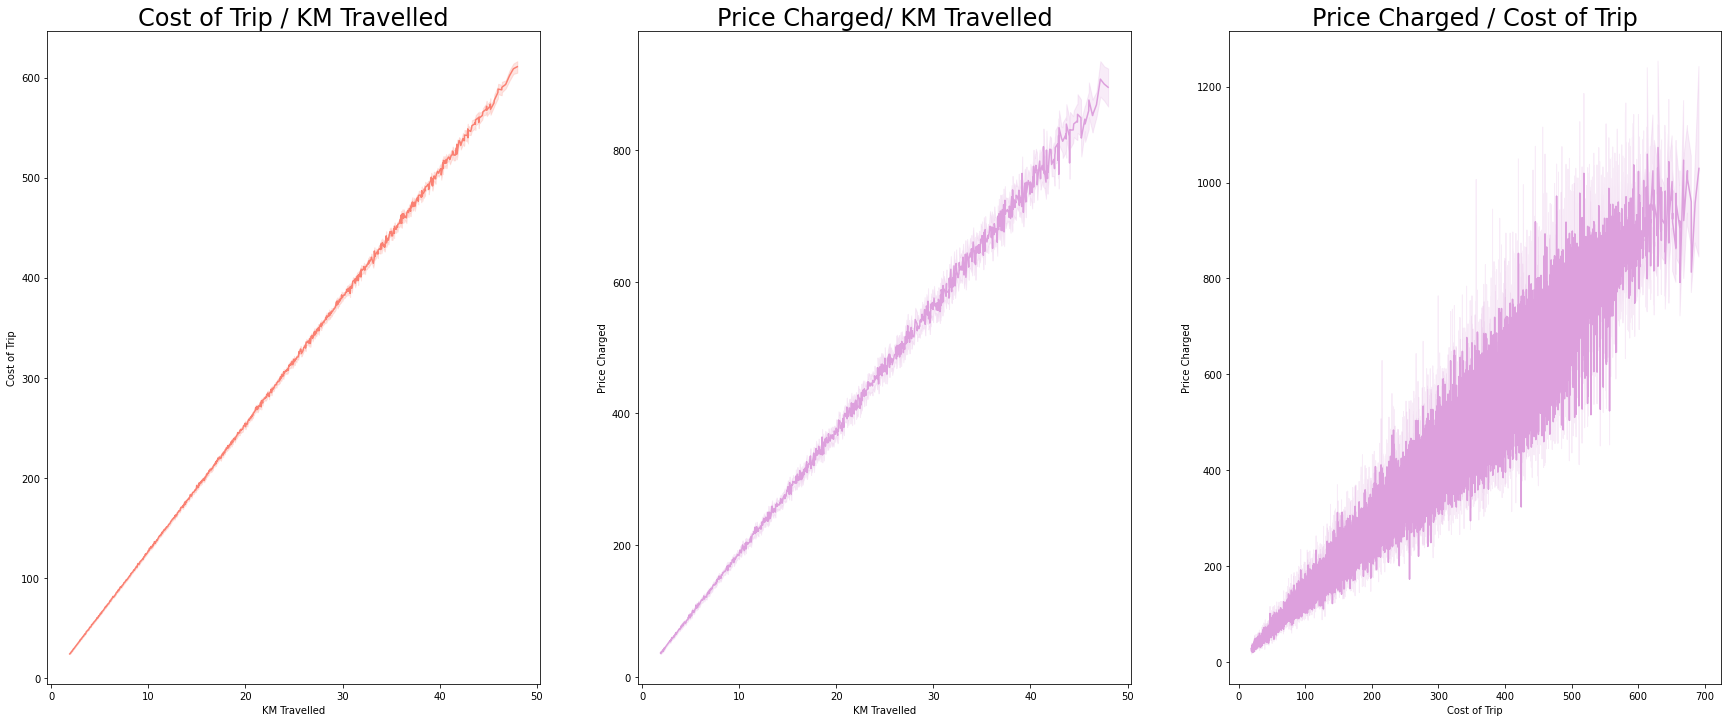

In [147]:
plt.figure(figsize=(30, 12))

plt.subplot(1, 3, 1)
sns.lineplot(data=cab_data, x="KM Travelled",y='Cost of Trip', color= 'salmon')
plt.title('Cost of Trip / KM Travelled', fontsize=24)
plt.xlabel('KM Travelled')
plt.ylabel('Cost of Trip')

plt.subplot(1, 3, 2)
sns.lineplot(data=cab_data, x="KM Travelled",y='Price Charged', color= 'plum')
plt.title('Price Charged/ KM Travelled', fontsize=24)
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')

plt.subplot(1, 3, 3)
sns.lineplot(data=cab_data, x="Cost of Trip",y='Price Charged', color= 'plum')
plt.title('Price Charged / Cost of Trip', fontsize=24)
plt.xlabel('Cost of Trip')
plt.ylabel('Price Charged')

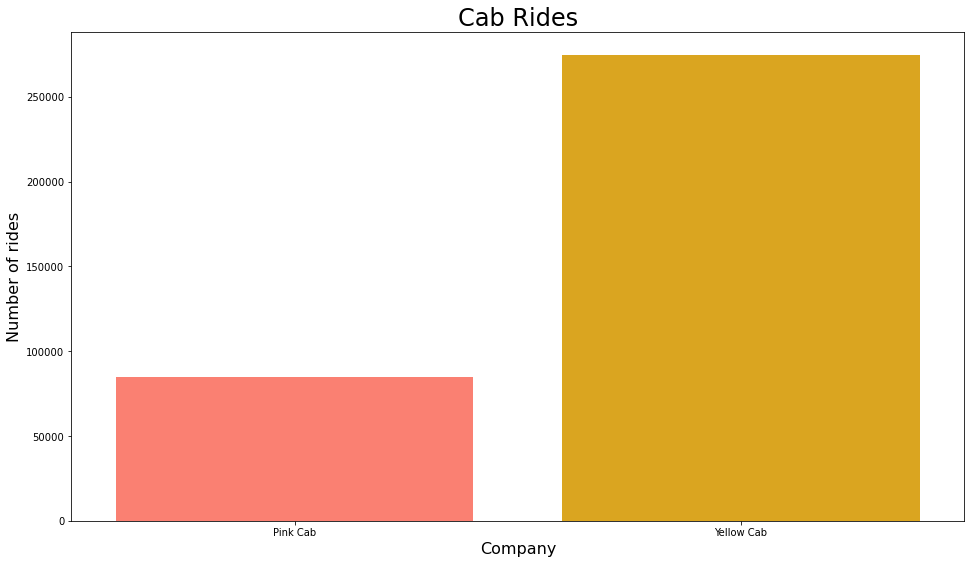

In [109]:
# Number of pink cab rides to yellow cab rides visualized.
plt.figure(figsize=(16, 9))
# cab_data['Company'].value_counts().plot(kind='bar', color=['Yellow', 'Pink'])
ax = sns.countplot(data=cab_data, x='Company')
ax.patches[0].set_facecolor('salmon')
ax.patches[1].set_facecolor('goldenrod')
plt.title("Cab Rides", fontsize=24);
plt.xlabel("Company", fontsize=16)
plt.ylabel("Number of rides", fontsize=16);

---
#### So as observed, number of yellow cab drives in the span of nearly three years is nearly 3 times more that pink cab drives
### Now: In the span of the same period of time, what is the profit comparison between the two companies.

In [15]:
# Average price grouped by cab company
cab_data_grouped = cab_data[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Company']].groupby('Company').sum().reset_index()

In [16]:
cab_data_grouped

,Company,KM Travelled,Price Charged,Cost of Trip
0,Pink Cab,1911073.11,2.632825e+07,2.102092e+07
1,Yellow Cab,6199417.47,1.258539e+08,8.183351e+07


In [17]:
# Revenue difference between yellow cab company and pink cab company
cab_data_grouped.iloc[1]['Price Charged'] - cab_data_grouped.iloc[0]['Price Charged']  

99525635.86000037

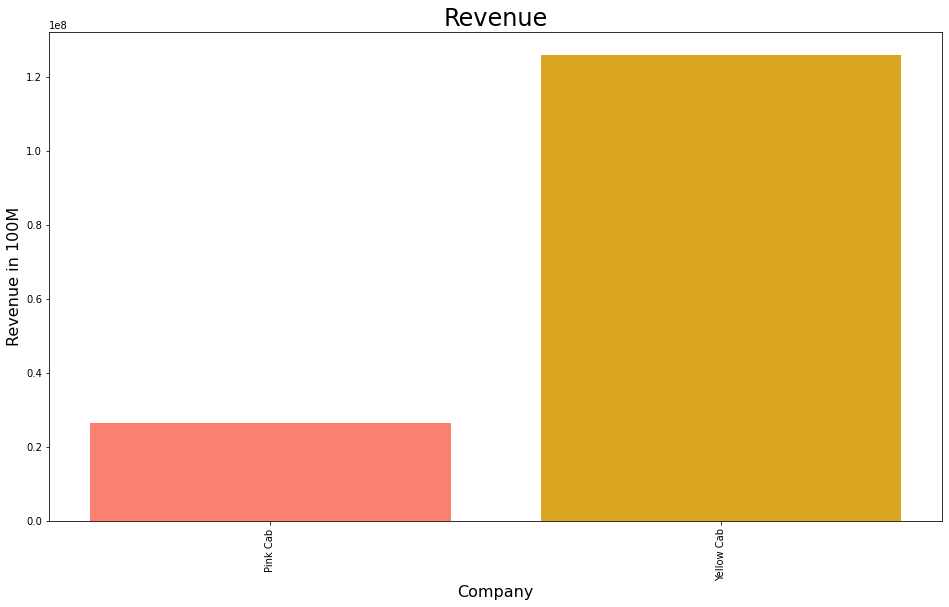

In [108]:
# difference in revenue visualized
plt.figure(figsize=(16, 9))
plt.bar(data=cab_data_grouped, x='Company', height='Price Charged', color=['salmon', 'goldenrod'])
plt.xticks(rotation = 90)
plt.title("Revenue", fontsize=24)
plt.xlabel("Company", fontsize=16)
plt.ylabel("Revenue in 100M", fontsize=16)
plt.show();

In [81]:
cab_data_grouped.reset_index(inplace=True)

#### So as observed: Yellow Cab Company made nearly 100 million dollars in revenue more than Pink Cab Company over the span of three years
---

#### Now: lets see the performance year wise: 2016, 2017 and 2018, to see the rate of growth in terms of Revenue and Km travelled.

In [20]:
# Group the data by each company and year
cab_data_yearly_grouped = cab_data.groupby(['Company', cab_data['Date of Travel'].dt.year]).sum().drop('Transaction ID', axis=1)

In [21]:
cab_data_yearly_grouped

KM Travelled  Price Charged  Cost of Trip
Company    Date of Travel                                           
Pink Cab   2016               563509.67   7.908479e+06  6.194968e+06
           2017               685823.52   9.578630e+06  7.544975e+06
           2018               661739.92   8.841143e+06  7.280980e+06
Yellow Cab 2016              1859978.21   3.848113e+07  2.455414e+07
           2017              2214879.02   4.581891e+07  2.924293e+07
           2018              2124560.24   4.155384e+07  2.803644e+07

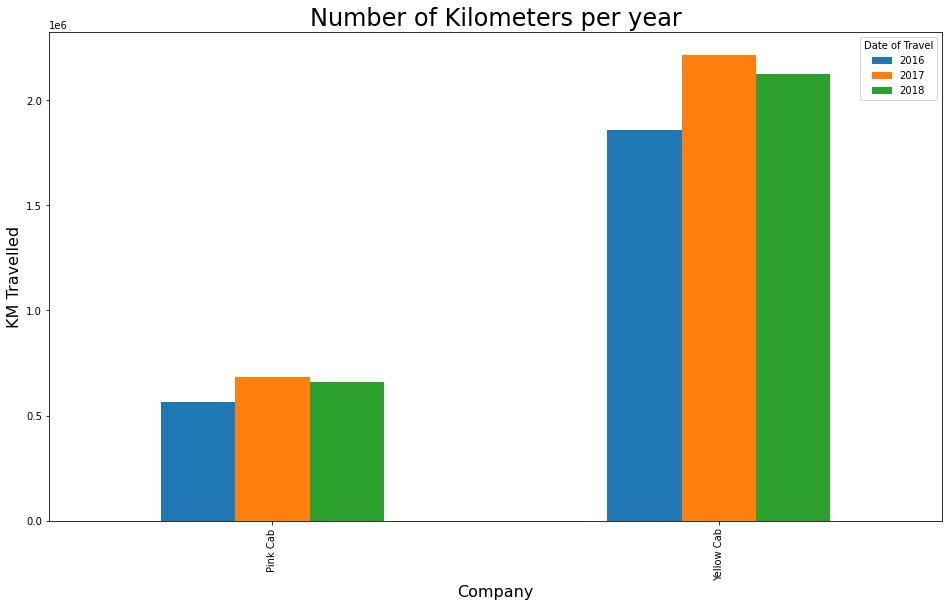

In [124]:
# Plot Kilometers travelled yearly comparison between yellow company and pink company
cab_data_yearly_grouped['KM Travelled'].unstack().plot(kind='bar');
plt.title("Number of Kilometers per year", fontsize=24)
plt.ylabel("KM Travelled", fontsize=16)
plt.xlabel('Company', fontsize=16)
plt.gcf().set_size_inches(16, 9)

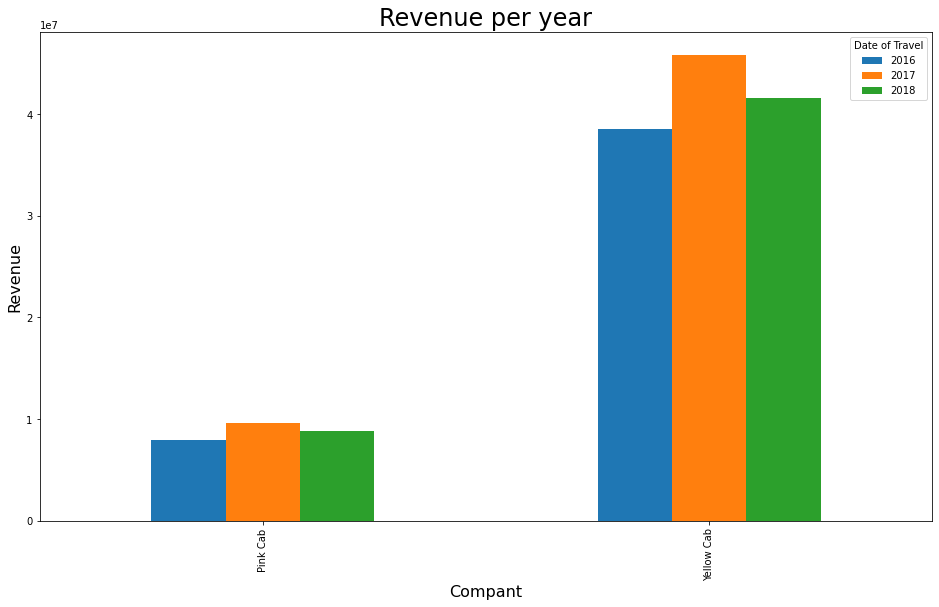

In [123]:
# Plot Revenue yearly comparison between yellow company and pink company
cab_data_yearly_grouped['Price Charged'].unstack().plot(kind='bar');
plt.title("Revenue per year", fontsize=24)
plt.ylabel("Revenue", fontsize=16)
plt.xlabel('Compant', fontsize=16)
plt.gcf().set_size_inches(16, 9)

#### As observed, the rate of growrth in term both companies in the span of three years is pretty steady, but both are much higher in the yellow cab company.
#### Lets see the average cost of trip and price charged

In [24]:
cab_data_grouped_average = cab_data.groupby(['Company', cab_data['Date of Travel'].dt.year]).mean().drop(['Transaction ID'], axis=1)
cab_data_grouped_average

KM Travelled  Price Charged  Cost of Trip
Company    Date of Travel                                           
Pink Cab   2016               22.468488     315.330113    247.008294
           2017               22.618763     315.907442    248.836603
           2018               22.577275     301.642530    248.412841
Yellow Cab 2016               22.616742     467.918301    298.570481
           2017               22.557303     466.639950    297.822893
           2018               22.541036     440.875558    297.459436

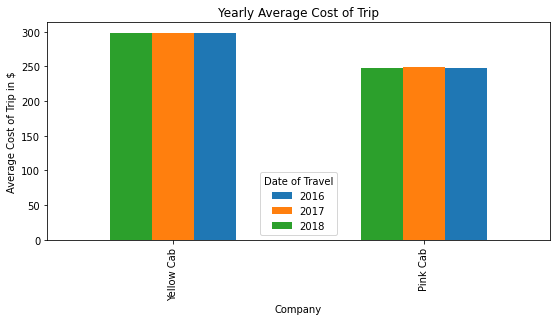

In [25]:
# Average cost of trip in 2016, 2017 and 2018
cab_data_grouped_average['Cost of Trip'].unstack().plot(kind='bar');
plt.gcf().set_size_inches(9, 4)
plt.gca().invert_xaxis()
plt.title('Yearly Average Cost of Trip')
plt.ylabel('Average Cost of Trip in $');

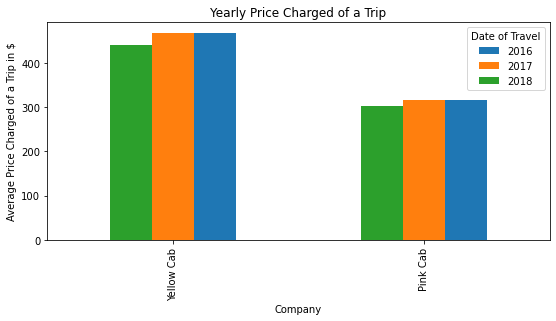

In [26]:
# Average price charged in 2016, 2017 and 2018
cab_data_grouped_average['Price Charged'].unstack().plot(kind='bar');
plt.gcf().set_size_inches(9, 4)
plt.gca().invert_xaxis()
plt.title('Yearly Price Charged of a Trip')
plt.ylabel('Average Price Charged of a Trip in $');

#### Yellow cab rides costs and charge little bit more than pink cab, there rate is steady though in the span of three years.
#### Maybe the reason of that is Yellow cab travel longer distances than pink cab.
#### Lets's see:

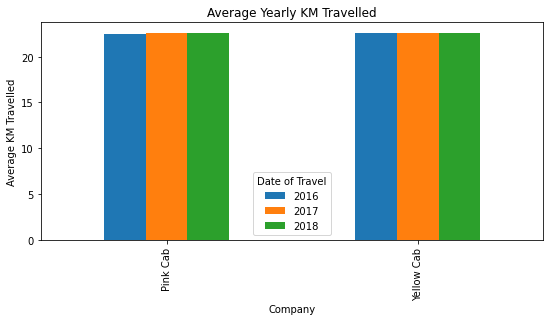

In [39]:
# Average yearly KM travelled
cab_data_grouped_average['KM Travelled'].unstack().plot(kind='bar')
plt.gcf().set_size_inches(9, 4)
# plt.gca().invert_xaxis()
plt.title('Average Yearly KM Travelled')
plt.ylabel('Average KM Travelled');

#### So they travel the same distance, however Yellow Cab costs more and charge more.
#### Now let's see monthly behaviour of both companies

In [28]:
# Group by two companies and see each month's sum.
cab_data_monthly_group_by_sum = cab_data.groupby(['Company', cab_data['Date of Travel'].dt.month]).sum().drop(['Transaction ID'], axis=1)
cab_data_monthly_group_by_sum

KM Travelled  Price Charged  Cost of Trip
Company    Date of Travel                                           
Pink Cab   1                  113740.49     1638294.62  1.250240e+06
           2                   76210.83     1089685.63  8.376443e+05
           3                   97080.92     1367533.76  1.068437e+06
           4                   91880.15     1257084.99  1.011267e+06
           5                  111492.84     1393308.68  1.224695e+06
           6                  133577.95     1703511.10  1.470796e+06
           7                  148305.55     1932649.58  1.630764e+06
           8                  174195.47     2304272.60  1.916021e+06
           9                  217291.43     2883611.63  2.389176e+06
           10                 237926.39     3312633.47  2.616196e+06
           11                 247898.67     3536883.37  2.726557e+06
           12                 261472.42     3908781.90  2.879128e+06
Yellow Cab 1                  412047.25     8797332.23  5.438896e+06
           2                  336179.66     7412477.30  4.436499e+06
           3                  393560.89     8346839.42  5.195625e+06
           4                  391822.07     8248645.24  5.173102e+06
           5                  421559.05     9546900.53  5.563357e+06
           6                  424771.06     9185653.68  5.605315e+06
           7                  478426.74     9178862.64  6.317301e+06
           8                  531992.91     9881988.88  7.025718e+06
           9                  611532.39    12213217.31  8.070835e+06
           10                 681823.67    13249509.74  8.998998e+06
           11                 715805.03    14056306.30  9.446985e+06
           12                 799896.75    15736153.92  1.056088e+07

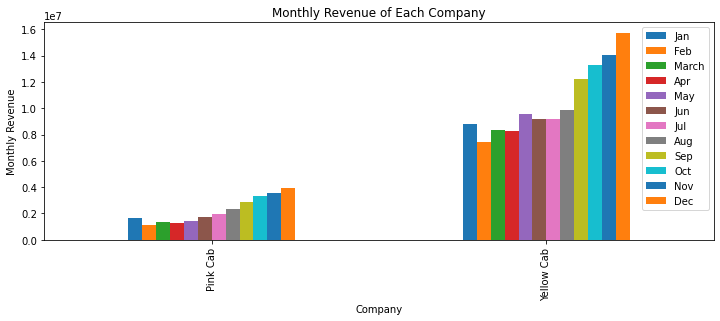

In [29]:
# Sum of Revenue of each month over three years
cab_data_monthly_group_by_sum['Price Charged'].unstack().plot(kind='bar')
plt.gcf().set_size_inches(12, 4)
plt.legend(['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
plt.title("Monthly Revenue of Each Company")
plt.ylabel("Monthly Revenue");
# plt.gca().invert_xaxis()

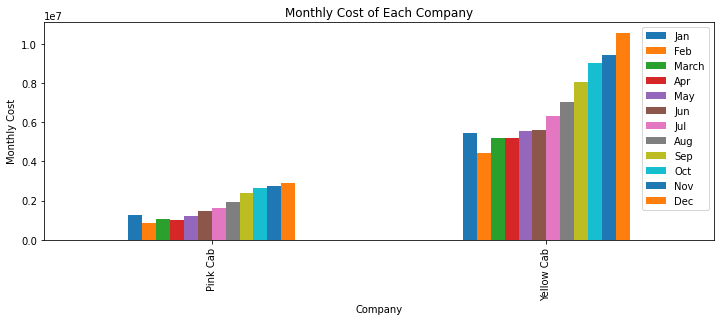

In [30]:
# Sum of trip costs of each month over three years
cab_data_monthly_group_by_sum['Cost of Trip'].unstack().plot(kind='bar')
plt.gcf().set_size_inches(12, 4)
plt.legend(['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
plt.title("Monthly Cost of Each Company")
plt.ylabel("Monthly Cost");

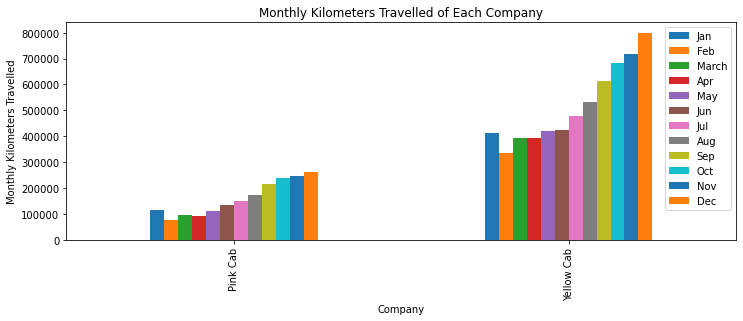

In [31]:
# Sum of Kilometers travelled in each month of the year over three years
cab_data_monthly_group_by_sum['KM Travelled'].unstack().plot(kind='bar')
plt.gcf().set_size_inches(12, 4)
plt.legend(['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
plt.title("Monthly Kilometers Travelled of Each Company")
plt.ylabel("Monthly Kilometers Travelled");

#### As Seen, in each month in the year, Yellow Cab company has more activity and income